Chaitali Wayakule

Matriculation ID:56543370

Import the dataset into a pandas dataframe. Make sure that the date column is 
in pandas date time format.

In [1]:
import pandas as pd
df = pd.read_csv("train.csv")
print(df)
df['datetime']=pd.to_datetime(df['datetime'])
print(df.dtypes)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

Q2.  Check the data type of each column. How many rows are there in the dataset 
? Does the dataset contain any missing values ?

In [2]:
num_rows = len(df)
print("Number of rows:", num_rows)
print(df.isnull().sum())

Number of rows: 10886
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


Q3. Using the date column, create new columns for: year, month, day of the week 
and hour of the day.

In [3]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()  
df['hour'] = df['datetime'].dt.hour
print(df.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month day_of_week  \
0        81        0.0       3          13     16  2011      1    Saturday   
1        80        0.0       8          32     40  2011      1    Saturday   
2        80        0.0       5          27     32  2011      1    Saturday   
3        75        0.0       3          10     13  2011      1    Saturday   
4        75        0.0       0           1      1  2011      1    Saturday   

   hour  
0     0  
1     1  
2     2  
3     3  
4     4  


Q4. Rename the values in the season column to spring, summer, fall and winter.

In [4]:
season_map = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
df['season'] = df['season'].map(season_map)
print(df)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00  spring        0           0        1   9.84   
1     2011-01-01 01:00:00  spring        0           0        1   9.02   
2     2011-01-01 02:00:00  spring        0           0        1   9.02   
3     2011-01-01 03:00:00  spring        0           0        1   9.84   
4     2011-01-01 04:00:00  spring        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00  winter        0           1        1  15.58   
10882 2012-12-19 20:00:00  winter        0           1        1  14.76   
10883 2012-12-19 21:00:00  winter        0           1        1  13.94   
10884 2012-12-19 22:00:00  winter        0           1        1  13.94   
10885 2012-12-19 23:00:00  winter        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

Q5. Calculate the total number of casual and registered bikes rented in the years 
2011 and 2012.

In [5]:
totals_by_year = df.groupby('year')[['casual','registered']].sum()
print(totals_by_year)


      casual  registered
year                    
2011  155817      626162
2012  236318     1067179


Q6.Calculate the mean of the hourly total rentals count by season. Which season 
has the highest mean ?

In [6]:
mean_by_season = df.groupby('season')['count'].mean().sort_values(ascending=False)
print(mean_by_season)

highest_season = mean_by_season.idxmax()
print("Highest mean season:", highest_season)

season
fall      234.417124
summer    215.251372
winter    198.988296
spring    116.343261
Name: count, dtype: float64
Highest mean season: fall


Q7.Are more bikes rented by registered users on working or non-working days ?  
Does the answer differ for non-registered users ? Is the answer the same for 
both years ?

In [7]:
overall_working = df.groupby('workingday')[['registered','casual']].mean()
print("Overall mean by workingday (0=non-working,1=working):")
print(overall_working)


by_year_working = df.groupby(['year','workingday'])[['registered','casual']].mean()
print(by_year_working)


Overall mean by workingday (0=non-working,1=working):
            registered     casual
workingday                       
0           129.198330  59.308290
1           167.904209  25.107663
                 registered     casual
year workingday                       
2011 0            97.153132  48.201276
     1           124.031909  19.664143
2012 0           160.767429  70.250286
     1           211.587507  30.527733


Q8. Which months in the year 2011 have the highest and the lowest total number of 
bikes rented ? Repeat for the year 2012.

In [8]:
monthly_totals = df.groupby(['year','month'])['count'].sum().unstack(level=0)  
print(monthly_totals)


highest_2011 = monthly_totals[2011].idxmax()
lowest_2011  = monthly_totals[2011].idxmin()
highest_2012 = monthly_totals[2012].idxmax()
lowest_2012  = monthly_totals[2012].idxmin()

print("2011 highest month:", highest_2011, "lowest month:", lowest_2011)
print("2012 highest month:", highest_2012, "lowest month:", lowest_2012)


year    2011    2012
month               
1      23552   56332
2      32844   66269
3      38735   94766
4      50517  116885
5      79713  120434
6      89776  130957
7      92848  121769
8      83296  130220
9      79104  133425
10     79522  127912
11     70889  105551
12     61183   98977
2011 highest month: 7 lowest month: 1
2012 highest month: 9 lowest month: 1


Q9. Which type of weather have the highest and lowest mean of the hourly total 
rentals count ?

In [9]:
mean_by_weather = df.groupby('weather')['count'].mean().sort_values(ascending=False)
print(mean_by_weather)


mean_by_weather = df.groupby('weather')['count'].mean().sort_values(ascending=False)
print(mean_by_weather)
print("Highest weather type:", mean_by_weather.idxmax())
print("Lowest weather type :", mean_by_weather.idxmin())


weather
1    205.236791
2    178.955540
4    164.000000
3    118.846333
Name: count, dtype: float64
weather
1    205.236791
2    178.955540
4    164.000000
3    118.846333
Name: count, dtype: float64
Highest weather type: 1
Lowest weather type : 3


Q10.Calculate the correlation between the hourly total rentals count and all the 
numerical columns in the dataset. Which column has the highest correlation 
with the total rentals count ?

In [10]:
corr_matrix = df.corr(numeric_only=True)

corr_with_count = corr_matrix['count'].sort_values(ascending=False)
print(corr_with_count)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64


Q11. Create a new categorical column called day_period, which can take four 
possible values: night, morning, afternoon and evening. These values 
correspond to the following binning of the hour column: 06 night, 612 
morning, 12-6: afternoon, 6-24:evening.

In [11]:
# Create day_period column based on the hour
def get_day_period(hour):
    if 0 <= hour < 6:
        return 'night'
    elif 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['day_period'] = df['hour'].apply(get_day_period)
print(df)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00  spring        0           0        1   9.84   
1     2011-01-01 01:00:00  spring        0           0        1   9.02   
2     2011-01-01 02:00:00  spring        0           0        1   9.02   
3     2011-01-01 03:00:00  spring        0           0        1   9.84   
4     2011-01-01 04:00:00  spring        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00  winter        0           1        1  15.58   
10882 2012-12-19 20:00:00  winter        0           1        1  14.76   
10883 2012-12-19 21:00:00  winter        0           1        1  13.94   
10884 2012-12-19 22:00:00  winter        0           1        1  13.94   
10885 2012-12-19 23:00:00  winter        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

Q12.Generate a pivot table for the mean of the hourly total rentals count, with the 
index set to the day period and the column set to the working day column. 
What can you observe from the table ?

In [12]:
# Pivot table: mean of total hourly rentals (count)
pivot_table = pd.pivot_table(
    df,
    values='count',
    index='day_period',
    columns='workingday',
    aggfunc='mean'
)

# Rename workingday values for readability
pivot_table = pivot_table.rename(columns={0: 'non-working', 1: 'working'})

# Display result
print(pivot_table)


workingday  non-working     working
day_period                         
afternoon    371.022989  266.196141
evening      180.182759  251.054662
morning      157.772414  234.353763
night         44.052083   16.217582


1. Plot the distributions of all the numerical columns in the dataset using
histograms.

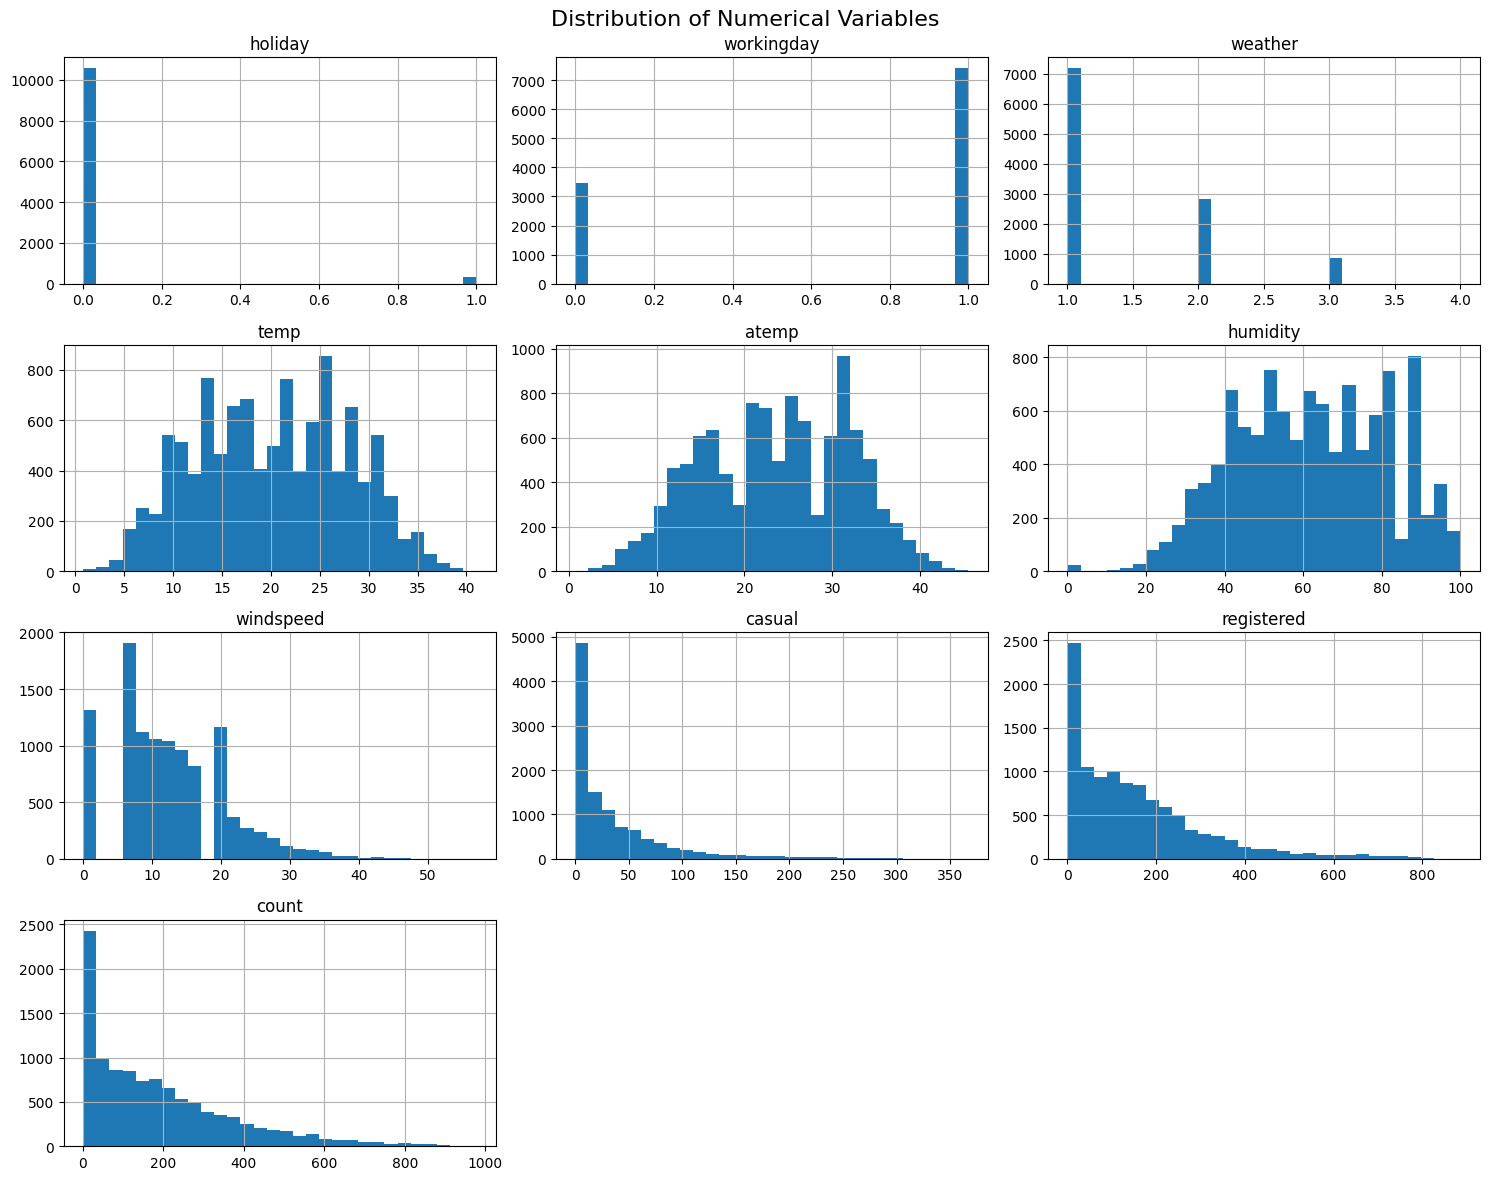

In [13]:
# Import required libraries
import matplotlib.pyplot as plt

# Select all numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms
df[num_cols].hist(
    figsize=(15, 12),
    bins=30
)

# Add title and layout adjustments
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()


2. Plot the distributions of all the numerical columns in the dataset using box
plots.


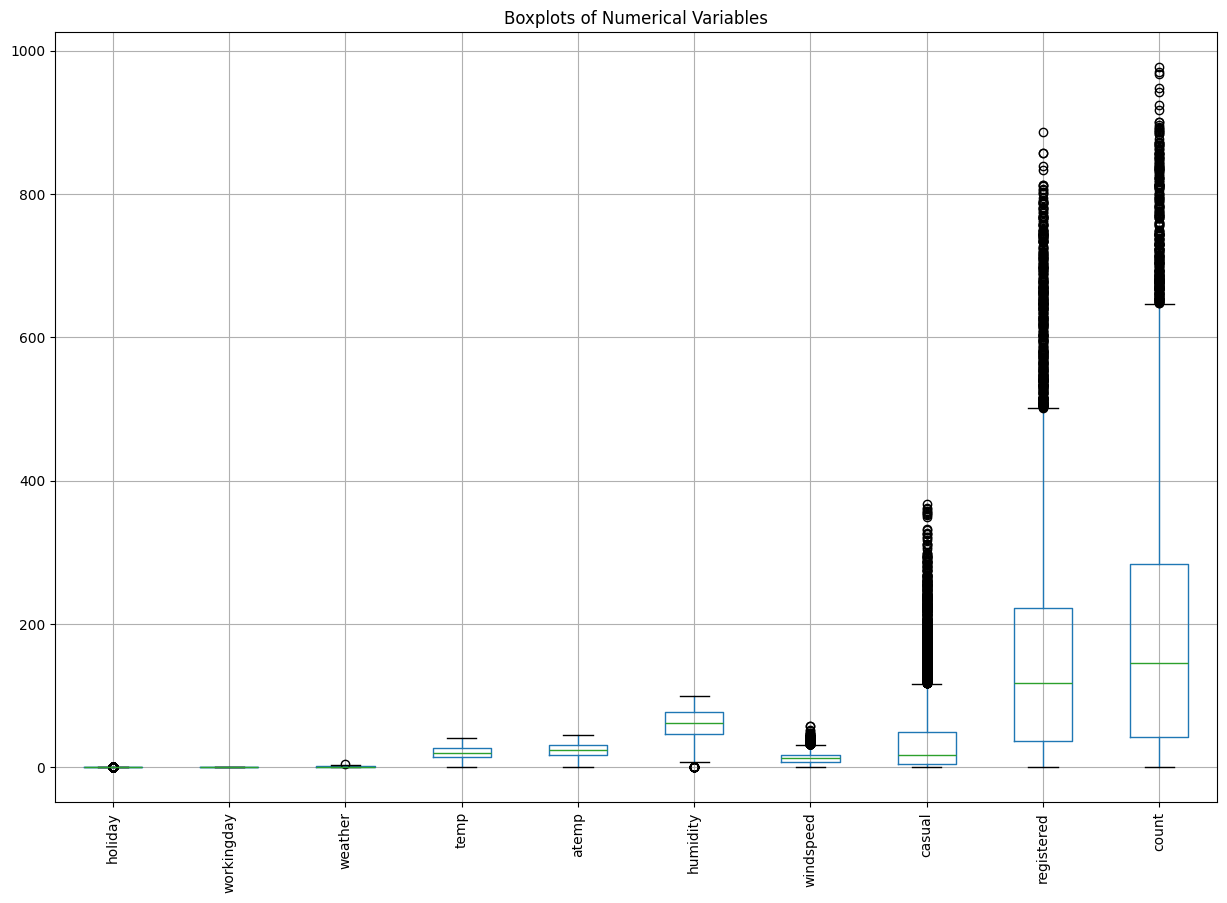

In [14]:
plt.figure(figsize=(15, 10))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Boxplots of Numerical Variables')
plt.show()


3. Plot the the mean of the hourly total rentals count for working and nonworking days

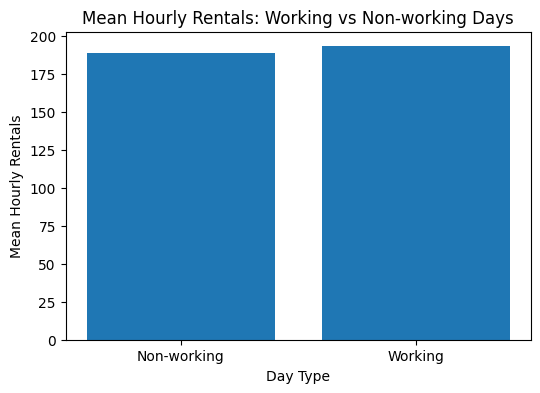

In [15]:
import matplotlib.pyplot as plt

# Calculate mean hourly rentals for working and non-working days
mean_working = df.groupby('workingday')['count'].mean()

# Plot using matplotlib
plt.figure(figsize=(6, 4))
plt.bar(mean_working.index.astype(str), mean_working.values)

# Formatting
plt.xticks([0, 1], ['Non-working', 'Working'])
plt.xlabel('Day Type')
plt.ylabel('Mean Hourly Rentals')
plt.title('Mean Hourly Rentals: Working vs Non-working Days')

plt.show()


4. Plot the the mean of the hourly total rentals count for the different months for
both years combined.

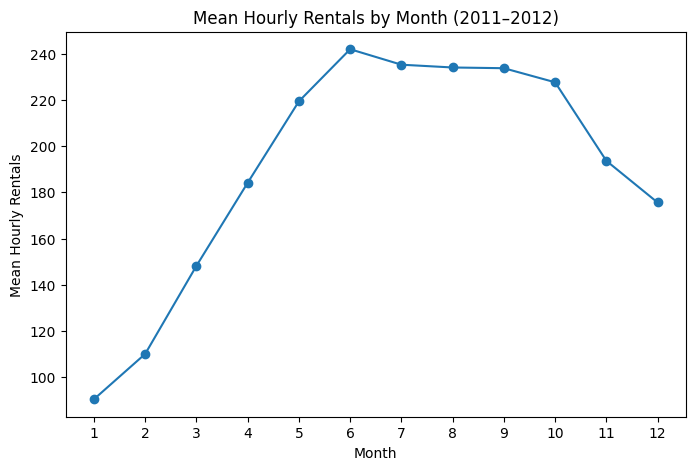

In [16]:
import matplotlib.pyplot as plt

# Calculate mean hourly rentals per month
monthly_mean = df.groupby('month')['count'].mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(monthly_mean.index, monthly_mean.values, marker='o')

# Formatting
plt.xlabel('Month')
plt.ylabel('Mean Hourly Rentals')
plt.title('Mean Hourly Rentals by Month (2011–2012)')
plt.xticks(range(1, 13))

plt.show()


5. Plot the the mean of the hourly total rentals count for the different months for
both years separately in a multi-panel figure.

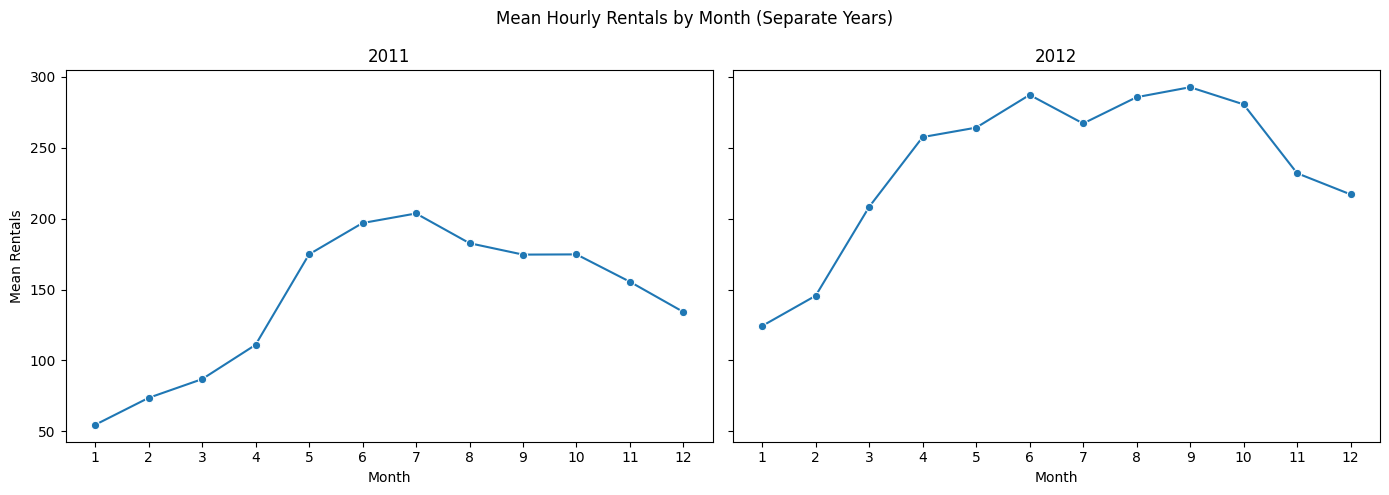

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Calculate monthly means by year
monthly_means = df.groupby(['year', 'month'])['count'].mean().reset_index()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# 2011 plot
data_2011 = monthly_means[monthly_means['year'] == 2011]
sns.lineplot(data=data_2011, x='month', y='count', marker='o', ax=ax1)
ax1.set_title('2011')
ax1.set_xlabel('Month')
ax1.set_ylabel('Mean Rentals')
ax1.set_xticks(range(1, 13))

# 2012 plot
data_2012 = monthly_means[monthly_means['year'] == 2012]
sns.lineplot(data=data_2012, x='month', y='count', marker='o', ax=ax2)
ax2.set_title('2012')
ax2.set_xlabel('Month')
ax2.set_xticks(range(1, 13))

plt.suptitle('Mean Hourly Rentals by Month (Separate Years)')
plt.tight_layout()
plt.show()

6. Plot the the mean and the 95% confidence interval of the hourly total rentals
count for the four different weather categories. What can you observe ?

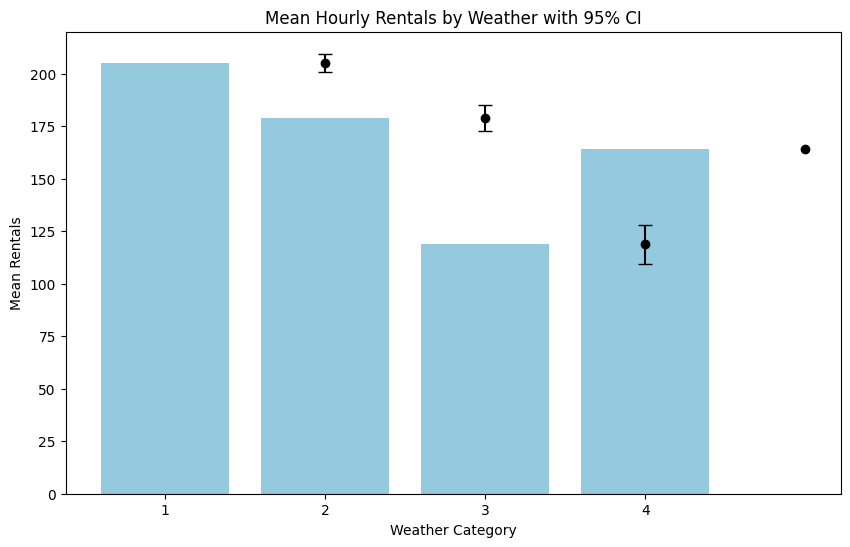

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('train.csv')

# Group by weather and calculate mean with CI
weather_stats = df.groupby('weather')['count'].agg(['mean', 'std', 'count'])
weather_stats['ci'] = 1.96 * weather_stats['std'] / np.sqrt(weather_stats['count'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_stats.index, y='mean', data=weather_stats, color='skyblue')
plt.errorbar(weather_stats.index, weather_stats['mean'], 
             yerr=weather_stats['ci'], fmt='o', color='black', capsize=5)
plt.title('Mean Hourly Rentals by Weather with 95% CI')
plt.xlabel('Weather Category')
plt.ylabel('Mean Rentals')
plt.show()

7. Plot the the mean of the hourly total rentals count versus the hour of the day.
Which hours of the day have the highest rentals count ?

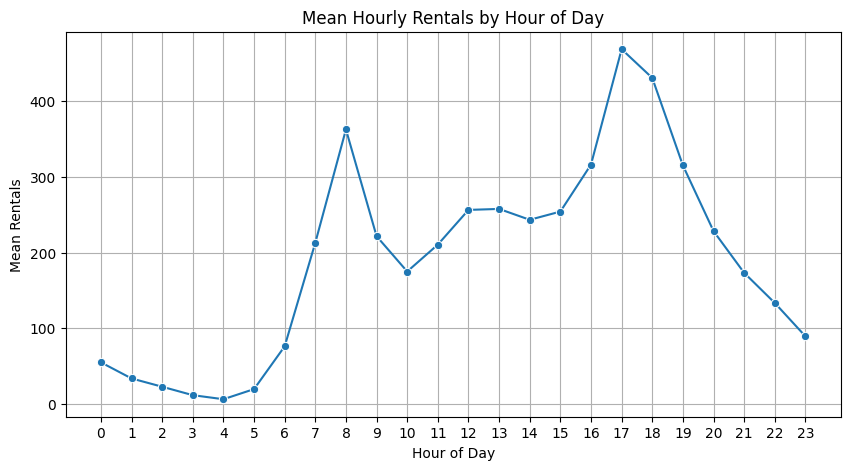

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
hourly_mean = df.groupby('hour')['count'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_mean.index, y=hourly_mean.values, marker='o')
plt.title('Mean Hourly Rentals by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Rentals')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()

8. Repeat the plot in 7 for different days of the week. What patterns can you
observe ?

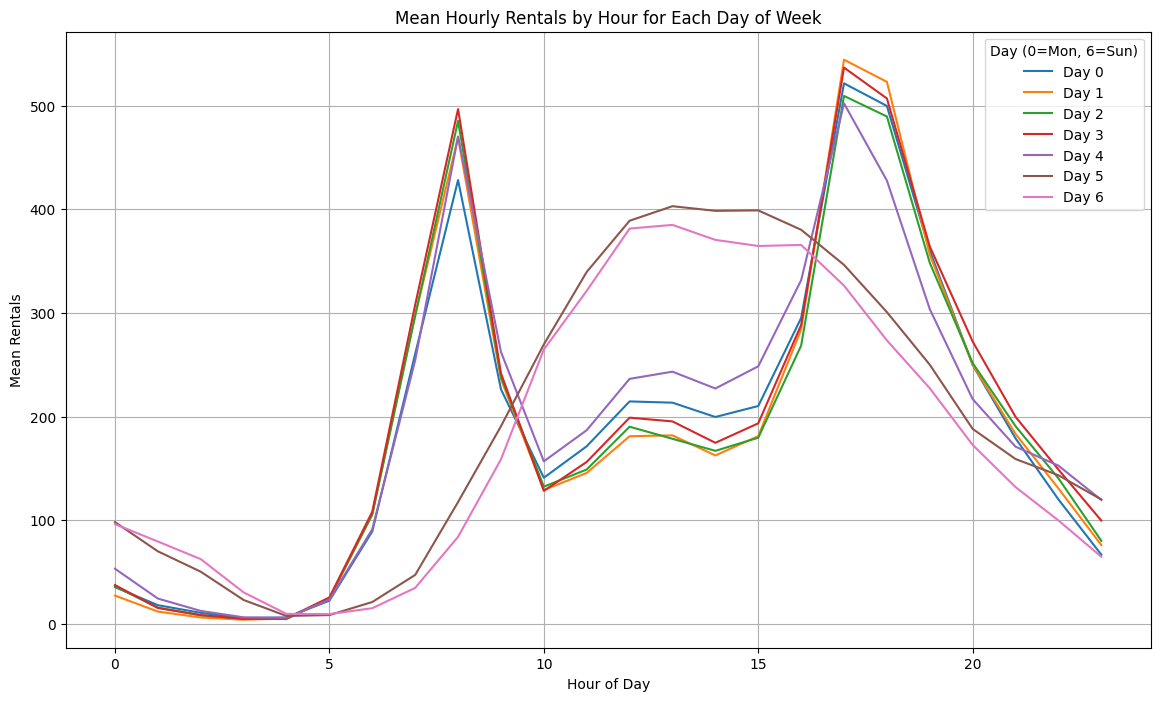

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

weekday_mean = df.groupby(['dayofweek', 'hour'])['count'].mean().reset_index()

plt.figure(figsize=(14,8))
for day in range(7):
    day_data = weekday_mean[weekday_mean['dayofweek'] == day]
    plt.plot(day_data['hour'], day_data['count'], label=f'Day {day}')
plt.title('Mean Hourly Rentals by Hour for Each Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Rentals')
plt.legend(title='Day (0=Mon, 6=Sun)')
plt.grid(True)
plt.show()

9. Repeat the plot in 8 for the four seasons using a multi-panel figure. What
patterns can you observe ?

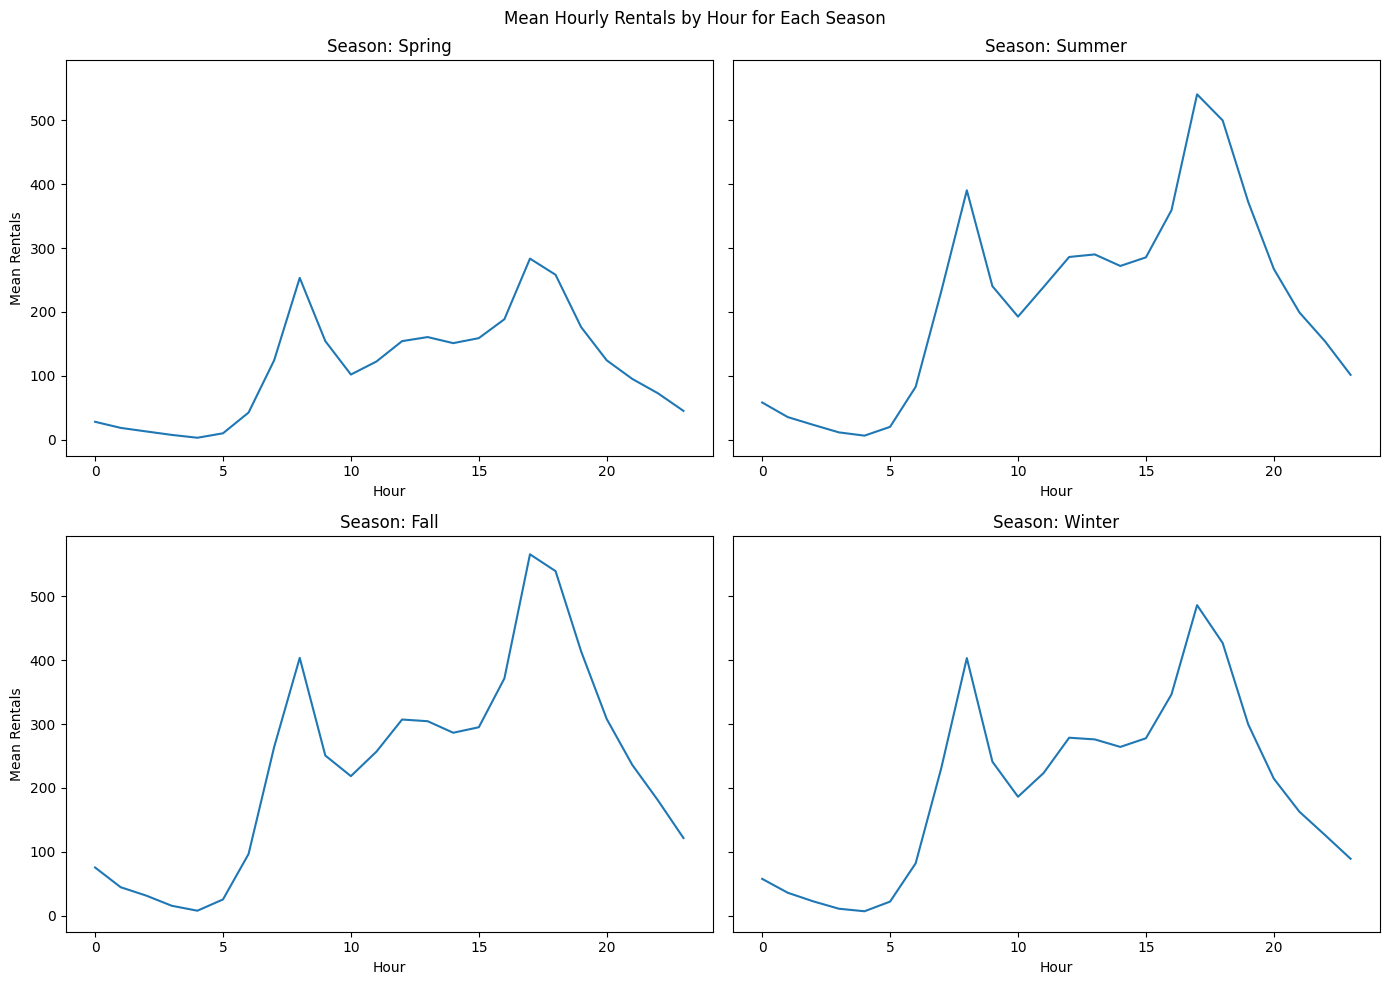

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['season_name'] = df['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

season_hour_mean = df.groupby(['season_name','hour'])['count'].mean().reset_index()

fig, axes = plt.subplots(2,2,figsize=(14,10),sharey=True)
axes = axes.flatten()
seasons = df['season_name'].unique()

for i, season in enumerate(seasons):
    season_data = season_hour_mean[season_hour_mean['season_name']==season]
    sns.lineplot(x='hour', y='count', data=season_data, ax=axes[i])
    axes[i].set_title(f'Season: {season}')
    axes[i].set_xlabel('Hour')
    axes[i].set_ylabel('Mean Rentals')

plt.suptitle('Mean Hourly Rentals by Hour for Each Season')
plt.tight_layout()
plt.show()

10. Plot the the mean and the 95% confidence interval of the hourly total rentals
count versus the period of the day column, which you created in the first part
of the assignment. Which period of the day has the highest rentals count ?
Does this peak period differ for working and non-working days ?

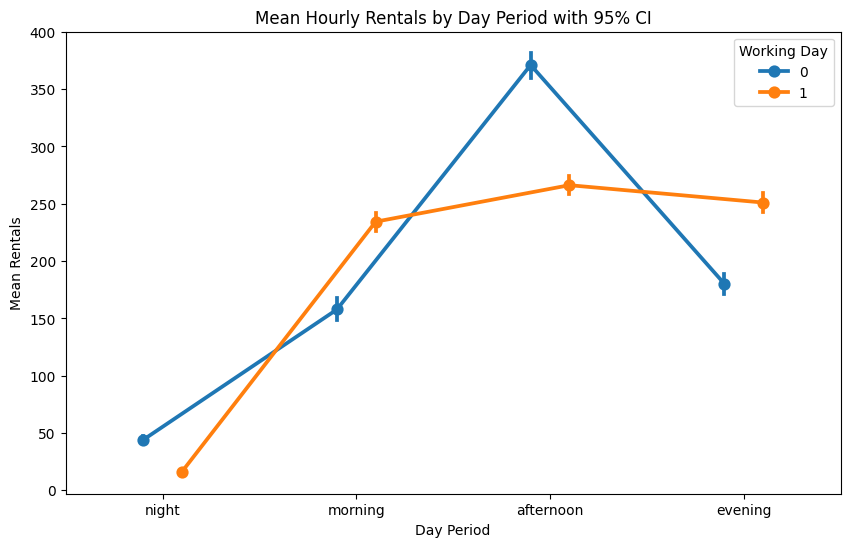

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('train.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour

# Create day_period column
df['day_period'] = pd.cut(df['hour'], 
                          bins=[0,6,12,18,24], 
                          labels=['night','morning','afternoon','evening'],
                          right=False)

# Plot with updated syntax
plt.figure(figsize=(10,6))
sns.pointplot(x='day_period', y='count', hue='workingday', data=df, 
              errorbar=('ci', 95), dodge=0.2)
plt.title('Mean Hourly Rentals by Day Period with 95% CI')
plt.xlabel('Day Period')
plt.ylabel('Mean Rentals')
plt.legend(title='Working Day')
plt.show()

11. Plot a heatmap for the correlation matrix of the dataset numerical variables.
What observations can you make ?

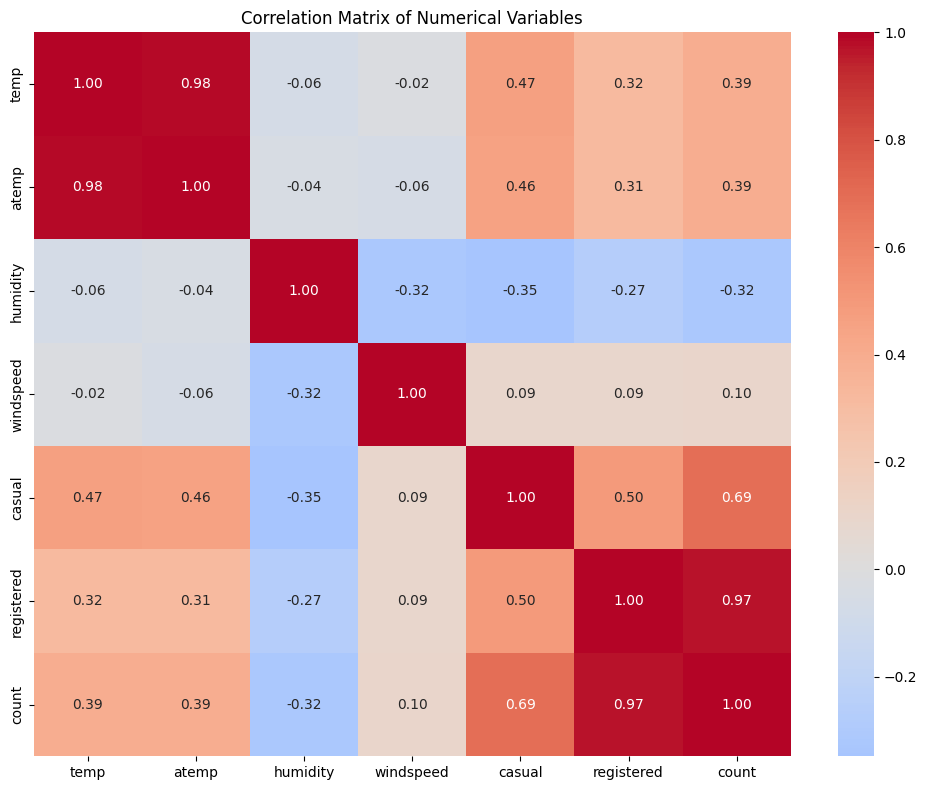

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('train.csv')

# Select numerical columns
numeric_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# Calculate correlation
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

3.3 Assignment III: Build & Publish an Interactive 
Dashboard